In [13]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
# URL сайта
url = 'https://www.mk.ru/'

# Отправляем GET-запрос на сайт
response = requests.get(url)

# Проверяем, что запрос прошел успешно
if response.status_code == 200:
    # Парсим содержимое страницы
    soup = BeautifulSoup(response.content, 'html.parser')

    # Находим все ссылки на новости
    news_links = []
    for link in soup.find_all('a', href=True):
        href = link['href']
        if href.endswith('.html'):
            news_links.append(f"https://www.mk.ru{href}")

    # Сохраняем ссылки в CSV файл
    with open('news_links.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Link'])
        for link in news_links:
            writer.writerow([link])

    print("Ссылки успешно сохранены в news_links.csv")
else:
    print(f"Ошибка при запросе страницы: {response.status_code}")

Ссылки успешно сохранены в news_links.csv


In [6]:
# Чистим собранные ссылки, удаляя дублирующуюся часть в начале каждой строки
with open('news_links.csv', 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    cleaned_links = [row for row in reader]
with open('news_links_cleaned.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    for row in cleaned_links:
        if row[0].startswith('https://www.mk.ruhttps://www.mk.ru'):
            row[0] = row[0].replace('https://www.mk.ruhttps://www.mk.ru', 'https://www.mk.ru', 1)
        writer.writerow(row)

print("Ссылки успешно очищены и сохранены в news_links_cleaned.csv")

Ссылки успешно очищены и сохранены в news_links_cleaned.csv


In [7]:
# Требуется доп очистка
filtered_links = []
with open('news_links_cleaned.csv', 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Пропускаем заголовок
    for row in reader:
        link = row[0]
        if not (link.startswith('https://www.mk.ruhttps://') or link.startswith('https://www.mk.ru/photo') or link.startswith('https://www.mk.ru/video') or link.startswith('https://www.mk.ru/merinov')):
            filtered_links.append(row)

# Сохраняем отфильтрованные ссылки в новый CSV файл
with open('news_links_filtered.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Link'])
    for row in filtered_links:
        writer.writerow(row)

print("Ссылки успешно отфильтрованы и сохранены в news_links_filtered.csv")

Ссылки успешно отфильтрованы и сохранены в news_links_filtered.csv


In [12]:
# Функция для парсинга данных со страницы новости
def parse_news_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Парсим заголовок
        title = soup.find('h1', class_='article__title').get_text(strip=True) if soup.find('h1', class_='article__title') else ''

        # Парсим текст, исключая теги <p> с вложенными <strong>
        paragraphs = soup.find_all('p')
        text = ' '.join([p.get_text(strip=True) for p in paragraphs if not p.find('strong')])

        # Парсим дату и время
        datetime_tag = soup.select_one('body > div.wraper > div.wraper__content > div.article-grid > div.article-grid__content > main > div.article__meta > p > span:nth-child(1) > time')
        if datetime_tag and 'datetime' in datetime_tag.attrs:
            datetime_str = datetime_tag['datetime']
            date, time = datetime_str.split('T')
            time = time.split('+')[0]
        else:
            date, time = '', ''

        # Парсим количество просмотров
        views_tag = soup.select_one('body > div.wraper > div.wraper__content > div.article-grid > div.article-grid__content > main > div.article__meta > p > span.meta__item.meta__item_views.meta__item_first-line > span')
        views = views_tag.get_text(strip=True) if views_tag else ''

        # Парсим метки
        tags = [tag.get_text(strip=True) for tag in soup.find_all('a', class_='article__tag-item')]

        return {
            'Title': title,
            'Text': text,
            'Date': date,
            'Time': time,
            'Views': views,
            'Tags': ', '.join(tags)
        }
    else:
        print(f"Ошибка при запросе страницы: {response.status_code}")
        return None

# Читаем ссылки из очищенного CSV файла
with open('news_links_filtered.csv', 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Пропускаем заголовок
    links = [row[0] for row in reader]

# Парсим данные со всех страниц новостей и сохраняем в новый CSV файл
parsed_data = []
for link in links:
    news_data = parse_news_page(link)
    if news_data:
        parsed_data.append(news_data)

# Сохраняем данные в новый CSV файл
with open('parsed_news_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Title', 'Text', 'Date', 'Time', 'Views', 'Tags']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for data in parsed_data:
        writer.writerow(data)

print("Данные успешно сохранены в parsed_news_data.csv")

Данные успешно сохранены в parsed_news_data.csv


[nltk_data] Downloading package punkt to C:\Users\Sonya
[nltk_data]     Hornygold\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sonya
[nltk_data]     Hornygold\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Наиболее частотные слова:
редакция: 291
московский: 218
комсомолец: 217
газеты: 195
аo: 194
года: 186
это: 167
москва: 111
связи: 106
главный: 104
сфере: 101
технологий: 100
зарегистрировано: 99
адрес: 99
редактор: 99
сторон: 99
издание: 98
информационных: 98
подписаться: 97
электронное: 97


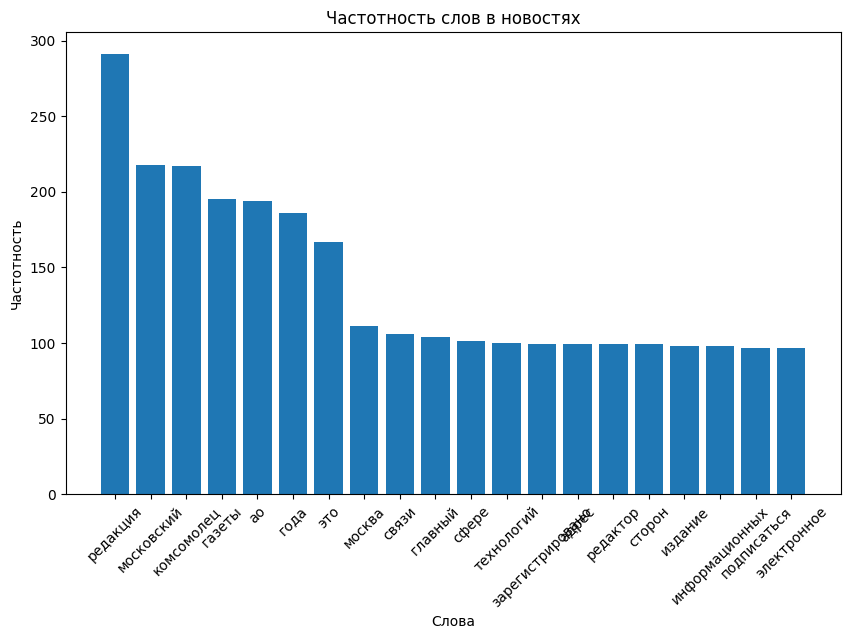

In [14]:
# Загружаем данные из CSV файла
df = pd.read_csv('parsed_news_data.csv')

# Объединяем все тексты новостей в один большой текст
all_text = ' '.join(df['Text'].dropna())

# Токенизация текста
nltk.download('punkt')
words = word_tokenize(all_text)

# Удаляем стоп-слова
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Считаем частотности слов
word_freq = Counter(filtered_words)

# Выводим наиболее частотные слова
most_common_words = word_freq.most_common(20)
print("Наиболее частотные слова:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Рисуем диаграмму частотности слов
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Слова')
plt.ylabel('Частотность')
plt.title('Частотность слов в новостях')
plt.xticks(rotation=45)
plt.show()